# Chapter 3 - Classification

## MNIST

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

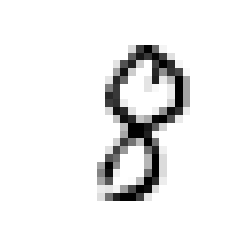

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[38000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
y[38000]

'8'

In [6]:
# Separate training and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
# Shuffle training set
import numpy as np
shuffle_index = np.random.permutation(60000)
shuffle_index

array([ 9434,  7730, 52270, ..., 44950, 15309, 50785])

In [8]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Binary Classification

In [9]:
# Binary classification example
y_train_8 = (y_train == '8')
y_test_8 = (y_test == '8')

In [10]:
# ...using SGD
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)

/home/tristan/Miniconda/envs/cs-notebooks/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

In [12]:
#
# Cross validate
#
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

/home/tristan/Miniconda/envs/cs-notebooks/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tristan/Miniconda/envs/cs-notebooks/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tristan/Miniconda/envs/cs-notebooks/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been 

array([0.86490675, 0.9169    , 0.93689684])

In [13]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)
y_train_pred

/home/tristan/Miniconda/envs/cs-notebooks/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tristan/Miniconda/envs/cs-notebooks/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tristan/Miniconda/envs/cs-notebooks/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been 

array([False, False, False, ..., False, False,  True])

In [14]:
y_train_pred.shape

(60000,)

In [15]:
#
# Confusion matrix
#
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_8, y_train_pred)


array([[51035,  3114],
       [ 2512,  3339]])

In [16]:
# First row and column represent negatives; so that means 51241 true negatives,
# 2907 false positives, 2623 false negatives, and 3228 true positives
#
# A more concise metric is 'precision': TP / (TP + FP)

3228 / (3228 + 2908)

0.5260756192959583

In [17]:
# Another is 'recall': TP / (TP + FN)

3228 / (3228 + 2623)

0.5517005640061527

In [18]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_8, y_train_pred)

0.5174337517433751

In [19]:
recall_score(y_train_8, y_train_pred)

0.5706716800546915

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_8, y_train_pred)

0.5427503250975292

In [21]:
#
# Precision recall curve
#
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores)

/home/tristan/Miniconda/envs/cs-notebooks/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tristan/Miniconda/envs/cs-notebooks/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tristan/Miniconda/envs/cs-notebooks/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been 

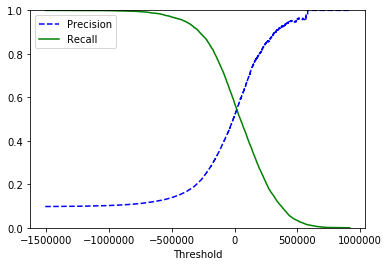

In [22]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [23]:
y_train_pred_90 = (y_scores > 300000)

In [24]:
precision_score(y_train_8, y_train_pred_90)

0.8839024390243903

In [25]:
recall_score(y_train_8, y_train_pred_90)

0.15484532558537

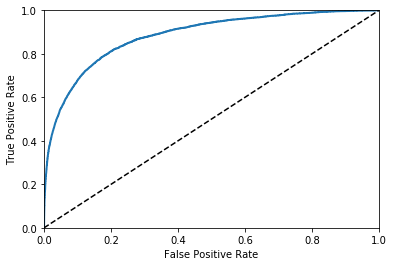

In [26]:
#
# ROC (receiver operating characteristic) curve
#
# Plots True Positive rate (recall) against false positive rate
#
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_8, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [27]:
#
# Measure the area under the curve
#
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_8, y_scores)

0.883949737944163

Since the ROC curve is so similar to the precision/recall (or PR) curve, you may wonder how to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise. For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the top- right corner).

In [28]:
#
# Random forest classifier
#
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

# The RandomForestClassifier class does not have a decision_function() method.
# Instead it has a predict_proba() method. cross_val_predict() can be instructed to
# use that method
y_probas_forest = cross_val_predict(forest_clf, 
                                    X_train, 
                                    y_train_8, 
                                    cv=3, 
                                    method="predict_proba")

# TODO: Why do some classifiers have a decision_function() method, while others
# have a predict_proba() method?

y_probas_forest

/home/tristan/Miniconda/envs/cs-notebooks/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/tristan/Miniconda/envs/cs-notebooks/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/tristan/Miniconda/envs/cs-notebooks/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.9, 0.1],
       [0. , 1. ]])

In [29]:
y_scores_forest = y_probas_forest[:,1]
y_scores_forest

array([0. , 0. , 0. , ..., 0. , 0.1, 1. ])

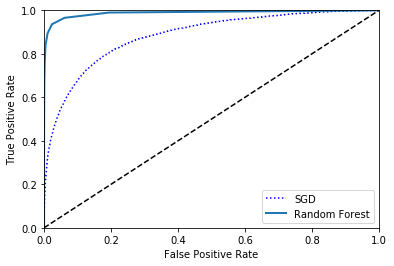

In [30]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_8, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [31]:
roc_auc_score(y_train_8, y_scores_forest)

0.9880497200292707

## Multiclass Classification